In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

In [2]:
# https://www.quandl.com/data/EOD/HD-Home-Depot-Inc-The-HD-Stock-Prices-Dividends-and-Splits
df = pd.read_csv('EOD-HD.csv').set_index('Date')
df = df.iloc[::-1]
df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,74.83,75.25,73.68,73.90,7802800.0,0.39,1.0,63.929303,64.288120,62.946827,63.134779,7802800.0
2013-09-04,73.98,74.51,73.74,74.14,8271600.0,0.00,1.0,63.203125,63.655918,62.998086,63.339817,8271600.0
2013-09-05,74.07,74.21,72.84,72.99,11039000.0,0.00,1.0,63.280014,63.399620,62.229192,62.357341,11039000.0
2013-09-06,73.55,73.56,72.21,72.70,9968400.0,0.00,1.0,62.835764,62.844307,61.690966,62.109586,9968400.0
2013-09-09,72.98,73.79,72.90,73.58,5781800.0,0.00,1.0,62.348798,63.040803,62.280452,62.861394,5781800.0


<AxesSubplot:xlabel='Date'>

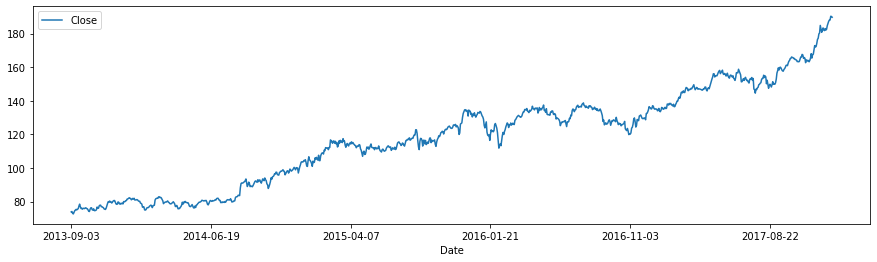

In [3]:
df[['Close']].plot(figsize=(15, 4))

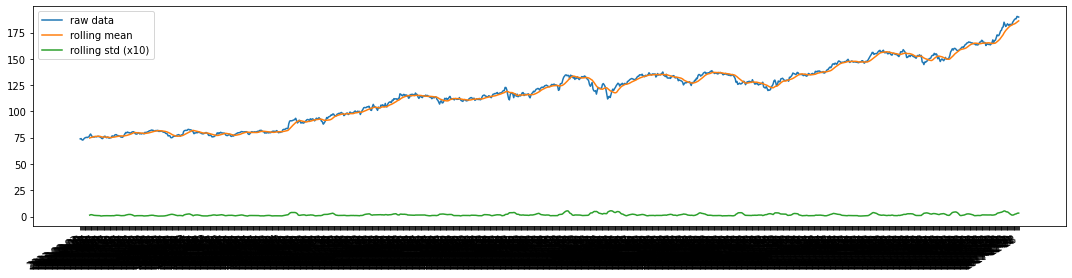

In [4]:
fig, ax = plt.subplots(1, figsize=(15, 4))
ax.plot(df.index, df[['Close']], label='raw data')
ax.plot(df[['Close']].rolling(window=12).mean(), label="rolling mean");
ax.plot(df[['Close']].rolling(window=12).std(), label="rolling std (x10)");
ax.legend()
plt.tight_layout()
fig.autofmt_xdate()

In [37]:
model = SimpleExpSmoothing(df[['Close']], initialization_method="estimated")
model

/home/ginkul/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [38]:
model.fit().forecast(3)

/home/ginkul/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


1090    189.78
1091    189.78
1092    189.78
dtype: float64